In [135]:
import numpy as np
import pandas as pd
import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [136]:
wiki = pd.read_csv(os.path.join('data', 'beatles_wiki_data.csv'), index_col=0)
wiki.head()

,Song,Core catalogue release(s),Songwriter(s),Lead vocal(s)[d],Year,Ref(s)
0,Across the Universe,Let It BePast Masters,LennonMcCartney,John Lennon,1969,[49][50]
1,Act Naturally,Help!,Johnny RussellVoni Morrison,Ringo Starr,1965,[51]
2,All I've Got to Do,With the Beatles,LennonMcCartney,Lennon,1963,[52]
3,All My Loving,With the Beatles,LennonMcCartney,Paul McCartney,1963,[52]
4,All Together Now,Yellow Submarine,LennonMcCartney,McCartney(with Lennon),1969,[53]


In [137]:
wiki['Core catalogue release(s)'] = wiki['Core catalogue release(s)'].apply(
    lambda x: 'Magical Mystery Tour' if 'Magical Mystery Tour' in x else x).apply(
    lambda x: 'Let It Be' if 'Let It Be' in x else x)

In [138]:
studio_albums = list(wiki['Core catalogue release(s)'].value_counts()[:13].index)
album_songs = wiki[wiki['Core catalogue release(s)'].isin(studio_albums)][['Song', 'Core catalogue release(s)', 'Year']]
album_songs = album_songs.rename(columns={'Core catalogue release(s)': 'Album'})
album_songs = album_songs[album_songs['Album'] != 'Past Masters'].reset_index(drop=True)
album_songs.head()

,Song,Album,Year
0,Across the Universe,Let It Be,1969
1,Act Naturally,Help!,1965
2,All I've Got to Do,With the Beatles,1963
3,All My Loving,With the Beatles,1963
4,All You Need Is Love,Magical Mystery Tour,1967


In [139]:
def fix(title):
    title = title.lower().replace(',', '').replace('!', '').replace('?', '').replace('.', '')
    return title

In [140]:
cops = list()
for i in album_songs['Song']:
    for j in os.listdir('data/beats'):
        if fix(i) == fix(j)[:-9]:
            cops.append((i,j))

In [141]:
beats = [x[1] for x in cops]
songs = [x[0] for x in cops]
attr = list()
f = False
for i in range(len(album_songs['Song'])):
    song = album_songs['Song'][i]
    for j in cops:
        if song == j[0]:
            attr.append(j[1])
            f = True
    if not f:
        attr.append(np.NaN)
    f = False

In [142]:
cops2=list()
for i in album_songs['Song']:
    for j in os.listdir('data/tracks'):
        if fix(i) == fix(j)[:-3]:
            cops2.append((i,j))

In [143]:
tracks = [x[1] for x in cops2]
songs = [x[0] for x in cops2]
aud = list()
f = False
for i in range(len(album_songs['Song'])):
    song = album_songs['Song'][i]
    for j in cops2:
        if song == j[0]:
            aud.append(j[1])
            f = True
    if not f:
        aud.append(np.NaN)
    f = False

In [144]:
paths = pd.DataFrame({'WikiSong': album_songs['Song'], 'MetaPath': attr, 'AudioPath': aud})
paths.head()

,WikiSong,MetaPath,AudioPath
0,Across the Universe,Across the Universe_beats.csv,NaN
1,Act Naturally,Act Naturally_beats.csv,Act Naturally.mp3
2,All I've Got to Do,All I've Got To Do_beats.csv,All I've Got To Do.mp3
3,All My Loving,All My Loving_beats.csv,All My Loving.mp3
4,All You Need Is Love,All You Need Is Love_beats.csv,All You Need Is Love.mp3


In [145]:
paths['MetaPath'][18] = 'Black Bird_beats.csv'
paths['MetaPath'][65] = 'Here_beats.csv'
paths['MetaPath'][77] = 'I Want You_beats.csv'
paths['MetaPath'][95] = 'Kansas City- Hey_beats.csv'
paths['MetaPath'][110] = 'Money_beats.csv'
paths['MetaPath'][118] = 'Ob-La-Di_beats.csv'
paths['MetaPath'][120] = 'Oh_beats.csv'
paths['MetaPath'][124] = 'Please Mister Postman_beats.csv'
paths['MetaPath'][127] = 'P. S. I Love You_beats.csv'

In [146]:
paths['AudioPath'][0] = 'Across The Universe (#2).mp3'
for i in [22, 40, 53, 63]:
    paths['AudioPath'][i] = 'Golden Slumbers-Carry That Weight-The End-Her Majesty.mp3'
paths['AudioPath'][46] = 'Fool On The Hill.mp3'
paths['AudioPath'][48] = 'For Your Blue.mp3'
paths['AudioPath'][49] = 'Get Back (Album Version).mp3'
paths['AudioPath'][90] = "I've Seen That Face.mp3"
paths['AudioPath'][95] = 'Kansas City-Hey, Hey, Hey, Hey.mp3'
paths['AudioPath'][96] = 'Let It Be (Album Version).mp3'
paths['AudioPath'][115] = 'Norwegian Wood (The Bird Has Flown).mp3'
paths['AudioPath'][124] = 'Please Mister Postman.mp3'
paths['AudioPath'][173] = 'You Like Me To Much.mp3'
for i in [143, 107, 126, 138]:
    paths['AudioPath'][i] = 'Sun King-Mean Mr. Mustard-Polythene Pam-She Came In Through The Bathroom Window.mp3'

In [219]:
'''
paths.to_csv('data/paths.csv')
'''

In [147]:
paths[paths['MetaPath'].isna()]

,WikiSong,MetaPath,AudioPath
129,Revolution 9,NaN,Revolution 9.mp3
172,You Know My Name (Look Up the Number),NaN,You Know My Name (Look Up The Number).mp3


In [148]:
song_info = album_songs.merge(paths, left_on='Song', right_on='WikiSong', how='left')[['Song', 'Album', 'MetaPath', 'AudioPath']].sort_values('Album')
song_info.head()

,Song,Album,MetaPath,AudioPath
79,If I Fell,A Hard Day's Night,If I Fell_beats.csv,If I Fell.mp3
21,Can't Buy Me Love,A Hard Day's Night,Can't Buy Me Love_beats.csv,Can't Buy Me Love.mp3
81,I'll Be Back,A Hard Day's Night,I'll Be Back_beats.csv,I'll Be Back.mp3
147,Tell Me Why,A Hard Day's Night,Tell Me Why_beats.csv,Tell Me Why.mp3
149,Things We Said Today,A Hard Day's Night,Things We Said Today_beats.csv,Things We Said Today.mp3


In [149]:
# Only run once
studio_albums.remove('Past Masters')

In [150]:
albums = pd.DataFrame({'Album':studio_albums, 'AlbumNumber': [10,11,6,2,5,7,4,3,12,8,1,9]})
albums

,Album,AlbumNumber
0,"The Beatles (""White Album"")",10
1,Abbey Road,11
2,Rubber Soul,6
3,With the Beatles,2
4,Help!,5
5,Revolver,7
6,Beatles for Sale,4
7,A Hard Day's Night,3
8,Let It Be,12
9,Sgt. Pepper's Lonely Hearts Club Band,8


# Metadata

In [151]:
song_info = song_info.merge(albums).sort_values('AlbumNumber')

In [152]:
song_info = song_info.reset_index(drop=True)

In [153]:
# Extract unique chords, num song elements, num key changes

def extract_unq_chords(metapath):
    if type(metapath) == float:
        return np.NaN
    open_path = metapath[:-10]
    
    chords_path = open_path + '_chords.csv'
    unq_chords = pd.read_csv(os.path.join('data/chords',chords_path))['chord'].unique()
    if 'N' in unq_chords:
        num_chords = len(unq_chords)-1
    else:
        num_chords = len(unq_chords)
    return num_chords

In [154]:
def extract_num_kc(metapath):
    if type(metapath) == float:
        return np.NaN
    open_path = metapath[:-10]
    
    kc_path = open_path + '_kc.csv'
    unq_keys = pd.read_csv(os.path.join('data/key_changes',kc_path))['key'].unique()
    return np.sum([1 if type(q)==str else 0 for q in unq_keys])-1

In [155]:
def extract_num_ss(metapath):
    if type(metapath) == float:
        return np.NaN
    open_path = metapath[:-10]
    
    ss_path = open_path + '_ss.csv'
    return len(pd.read_csv((os.path.join('data/structural_segmentation',ss_path))))

In [156]:
song_info['NumUniqueChords'] = song_info.MetaPath.apply(extract_unq_chords)
song_info['NumKeyChanges'] = song_info.MetaPath.apply(extract_num_kc)
song_info['NumSegments'] = song_info.MetaPath.apply(extract_num_ss)

In [157]:
song_info.head()

,Song,Album,MetaPath,AudioPath,AlbumNumber,NumUniqueChords,NumKeyChanges,NumSegments
0,Please Please Me,Please Please Me,Please Please Me_beats.csv,Please Please Me.mp3,1,7.0,0.0,8.0
1,Anna (Go to Him),Please Please Me,Anna (Go To Him)_beats.csv,Anna (Go to Him).mp3,1,9.0,0.0,11.0
2,I Saw Her Standing There,Please Please Me,I Saw Her Standing There_beats.csv,I Saw Her Standing There.mp3,1,6.0,0.0,14.0
3,Baby It's You,Please Please Me,Baby It's You_beats.csv,Baby It's You.mp3,1,5.0,0.0,6.0
4,Do You Want to Know a Secret,Please Please Me,Do You Want To Know A Secret_beats.csv,Do You Want To Know A Secret.mp3,1,14.0,0.0,8.0


In [158]:
piecesdf = pd.DataFrame(song_info.groupby('AlbumNumber')['NumUniqueChords'].mean())
piecesdf['NumKeyChanges'] = song_info.groupby('AlbumNumber')['NumKeyChanges'].mean()
piecesdf['NumSegments'] = song_info.groupby('AlbumNumber')['NumSegments'].mean()

In [159]:
piecesdf

,NumUniqueChords,NumKeyChanges,NumSegments
AlbumNumber,,,
1,7.846154,0.000000,9.307692
2,8.714286,0.071429,10.785714
3,9.846154,0.461538,10.307692
4,8.857143,0.000000,10.642857
5,9.571429,0.000000,10.428571
6,8.857143,0.142857,11.428571
7,8.357143,0.000000,10.928571
8,13.692308,0.538462,10.000000
9,14.090909,0.000000,11.181818


In [160]:
album_feats = albums.merge(piecesdf, left_on='AlbumNumber', right_on='AlbumNumber').sort_values('AlbumNumber').reset_index(drop=True)
album_feats

,Album,AlbumNumber,NumUniqueChords,NumKeyChanges,NumSegments
0,Please Please Me,1,7.846154,0.000000,9.307692
1,With the Beatles,2,8.714286,0.071429,10.785714
2,A Hard Day's Night,3,9.846154,0.461538,10.307692
3,Beatles for Sale,4,8.857143,0.000000,10.642857
4,Help!,5,9.571429,0.000000,10.428571
5,Rubber Soul,6,8.857143,0.142857,11.428571
6,Revolver,7,8.357143,0.000000,10.928571
7,Sgt. Pepper's Lonely Hearts Club Band,8,13.692308,0.538462,10.000000
8,Magical Mystery Tour,9,14.090909,0.000000,11.181818
9,"The Beatles (""White Album"")",10,12.172414,0.103448,10.137931


# Lyrics

In [161]:
lyrics = pd.read_csv('data/lyrics.csv')
lyrics.head()

,title,album,year,lyrics,cover,songwriters_parsed,vocals_parsed
0,12-Bar Original,Anthology 2,1965,NaN,False,"[""John Lennon"", ""Paul McCartney"", ""George Harr...","[""Instrumental""]"
1,Across the Universe,Let It Be,1968,Words are flowing out like endless rain into a...,False,"[""John Lennon""]","[""Lennon""]"
2,Act Naturally,Help!,1965,They're gonna put me in the movies They're gon...,True,"[""Johnny Russell"", ""Voni Morrison""]","[""Starr""]"
3,Ain't She Sweet,Anthology 1,1961,"Oh aint she sweet, Well see her walking down t...",True,"[""Jack Yellen"", ""Milton Ager""]","[""Lennon""]"
4,All I've Got to Do,With the Beatles,1963,"Whenever I want you around, yeah. All I gotta ...",False,"[""John Lennon""]","[""Lennon""]"


In [162]:
lyrics['title'][54] = 'Do You Want to Know a Secret'
lyrics['title'][229] = 'She Came In Through the Bathroom Window'
lyrics['title'][304] = 'You Really Got a Hold on Me'

In [163]:
unqtots = list()
for album in album_feats['Album']:
    if album == 'The Beatles ("White Album")':
        album = 'The Beatles'
    songs = lyrics[lyrics['album'] == album]
    unq_words = list()
    total_words = 0
    album_lyrics = songs['lyrics']
    for song_lyrics in album_lyrics:
        if type(song_lyrics) == float:
            continue
        wordlist = fix(song_lyrics).split()
        for w in wordlist:
            total_words += 1
            if w not in unq_words:
                unq_words.append(w)
    unqtot = len(unq_words)/total_words
    unqtots.append(unqtot)

In [164]:
album_feats['UniqueWordsPerWord'] = unqtots
album_feats

,Album,AlbumNumber,NumUniqueChords,NumKeyChanges,NumSegments,UniqueWordsPerWord
0,Please Please Me,1,7.846154,0.000000,9.307692,0.183031
1,With the Beatles,2,8.714286,0.071429,10.785714,0.199484
2,A Hard Day's Night,3,9.846154,0.461538,10.307692,0.162908
3,Beatles for Sale,4,8.857143,0.000000,10.642857,0.191516
4,Help!,5,9.571429,0.000000,10.428571,0.166741
5,Rubber Soul,6,8.857143,0.142857,11.428571,0.182141
6,Revolver,7,8.357143,0.000000,10.928571,0.240482
7,Sgt. Pepper's Lonely Hearts Club Band,8,13.692308,0.538462,10.000000,0.275120
8,Magical Mystery Tour,9,14.090909,0.000000,11.181818,0.216468
9,"The Beatles (""White Album"")",10,12.172414,0.103448,10.137931,0.185522


# Librosa

In [224]:
import librosa

In [225]:
def get_mfcc_vector(title):
    audiopath = 'data/tracks'
    offset = 30
    duration = 30
    shorties = ['Dig It', 'Maggie Mae', 'Wild Honey Pie']
    if title == 'Mean Mr. Mustard':
        offset = 174
    if title == 'Polythene Pam':
        offset = 242
    if title == 'She Came In Through the Bathroom Window':
        offset = 344
    if title == 'Carry That Weight':
        offset = 121
    if title == 'The End':
        offset = 217
    if title == 'Her Majesty':
        offset = 327
        duration = 23
    if title in shorties:
        offset = 0
    audiofn = song_info[song_info['Song'] == title]['AudioPath'].values[0]
    x, sr = librosa.load(os.path.join(audiopath, audiofn), offset=offset, duration=duration)
    mfcc = librosa.feature.mfcc(x, sr, n_mfcc=10)
    means = np.array([np.mean(row) for row in mfcc])
    print('X')
    return means

In [227]:
song_info['MFCCVector'] = song_info['Song'].apply(get_mfcc_vector)

X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X


In [229]:
# In-album variation vs. album distance from mean
song_info.head()

,Song,Album,MetaPath,AudioPath,AlbumNumber,NumUniqueChords,NumKeyChanges,NumSegments,MFCCVector,DistFromMean
0,Please Please Me,Please Please Me,Please Please Me_beats.csv,Please Please Me.mp3,1,7.0,0.0,8.0,"[-66.83711, 93.91224, -21.048206, 27.061354, 0...",32.461697
1,Anna (Go to Him),Please Please Me,Anna (Go To Him)_beats.csv,Anna (Go to Him).mp3,1,9.0,0.0,11.0,"[-116.40216, 108.35807, -20.399214, 22.143333,...",33.854603
2,I Saw Her Standing There,Please Please Me,I Saw Her Standing There_beats.csv,I Saw Her Standing There.mp3,1,6.0,0.0,14.0,"[-59.3666, 77.59687, -15.914967, 27.81052, -2....",41.896492
3,Baby It's You,Please Please Me,Baby It's You_beats.csv,Baby It's You.mp3,1,5.0,0.0,6.0,"[-95.0599, 98.002335, -3.6832502, 24.089851, -...",16.765083
4,Do You Want to Know a Secret,Please Please Me,Do You Want To Know A Secret_beats.csv,Do You Want To Know A Secret.mp3,1,14.0,0.0,8.0,"[-114.31364, 99.97185, -2.5772738, 24.01169, -...",23.008553


In [230]:
def get_album_mean(title):
    songsdf = song_info[song_info['Album'] == title]
    vectors = songsdf.MFCCVector.values
    album_mean = [np.mean([v[i] for v in vectors]) for i in range(len(vectors[0]))]
    return album_mean

In [231]:
# In-album variation: Average song distance from album mean
def in_album_variation(album_title):
    songsdf = song_info[song_info['Album'] == album_title]
    album_mean = get_album_mean(album_title)
    return np.mean([np.linalg.norm(v-album_mean) for v in songsdf['MFCCVector']])

In [232]:
in_album_vars = [in_album_variation(a) for a in albums['Album']]
albums['Intra-Album Variation'] = in_album_vars
albums.sort_values('AlbumNumber')

,Album,AlbumNumber,Intra-Album Variation,AvgDistanceFromMeanSong
10,Please Please Me,1,26.633848,18.198301
3,With the Beatles,2,28.389112,45.703262
7,A Hard Day's Night,3,33.209175,48.598900
6,Beatles for Sale,4,38.224758,16.503937
4,Help!,5,31.851757,37.902969
2,Rubber Soul,6,37.291786,21.645826
5,Revolver,7,40.754581,17.579210
9,Sgt. Pepper's Lonely Hearts Club Band,8,44.017536,12.407536
11,Magical Mystery Tour,9,45.613407,22.936270
0,"The Beatles (""White Album"")",10,65.800331,31.157799


In [233]:
# Album distance from mean: Album mean distance from overall mean
def extra_album_variation():
    vectors = song_info.MFCCVector.values
    overall_mean = np.array([np.mean([v[i] for v in vectors]) for i in range(len(vectors[0]))])
    return [np.linalg.norm(album_mean-overall_mean) for album_mean in [np.array(get_album_mean(title)) for title in albums['Album']]]

In [234]:
albums['AvgDistanceFromMeanSong'] = extra_album_variation()
albums.sort_values('AlbumNumber')

,Album,AlbumNumber,Intra-Album Variation,AvgDistanceFromMeanSong
10,Please Please Me,1,26.633848,17.849085
3,With the Beatles,2,28.389112,45.236080
7,A Hard Day's Night,3,33.209175,48.114620
6,Beatles for Sale,4,38.224758,16.028515
4,Help!,5,31.851757,37.376965
2,Rubber Soul,6,37.291786,21.599354
5,Revolver,7,40.754581,17.129536
9,Sgt. Pepper's Lonely Hearts Club Band,8,44.017536,12.913732
11,Magical Mystery Tour,9,45.613407,23.371273
0,"The Beatles (""White Album"")",10,65.800331,32.173798


In [242]:
song_info['DistFromMean'] = [np.linalg.norm(v-overall_mean) for v in song_info.MFCCVector]

In [243]:
song_info

,Song,Album,MetaPath,AudioPath,AlbumNumber,NumUniqueChords,NumKeyChanges,NumSegments,MFCCVector,DistFromMean
0,Please Please Me,Please Please Me,Please Please Me_beats.csv,Please Please Me.mp3,1,7.0,0.0,8.0,"[-66.83711, 93.91224, -21.048206, 27.061354, 0...",32.461697
1,Anna (Go to Him),Please Please Me,Anna (Go To Him)_beats.csv,Anna (Go to Him).mp3,1,9.0,0.0,11.0,"[-116.40216, 108.35807, -20.399214, 22.143333,...",33.854603
2,I Saw Her Standing There,Please Please Me,I Saw Her Standing There_beats.csv,I Saw Her Standing There.mp3,1,6.0,0.0,14.0,"[-59.3666, 77.59687, -15.914967, 27.81052, -2....",41.896492
3,Baby It's You,Please Please Me,Baby It's You_beats.csv,Baby It's You.mp3,1,5.0,0.0,6.0,"[-95.0599, 98.002335, -3.6832502, 24.089851, -...",16.765083
4,Do You Want to Know a Secret,Please Please Me,Do You Want To Know A Secret_beats.csv,Do You Want To Know A Secret.mp3,1,14.0,0.0,8.0,"[-114.31364, 99.97185, -2.5772738, 24.01169, -...",23.008553
...,...,...,...,...,...,...,...,...,...,...
175,I've Got a Feeling,Let It Be,I've Got A Feeling_beats.csv,I've Got A Feeling.mp3,12,10.0,0.0,11.0,"[-61.53586, 93.81976, 1.3324953, 19.359758, 12...",39.789333
176,Get Back,Let It Be,Get Back_beats.csv,Get Back (Album Version).mp3,12,10.0,0.0,13.0,"[-98.437256, 123.80853, -12.61414, 39.812572, ...",34.092171
177,For You Blue,Let It Be,For You Blue_beats.csv,For Your Blue.mp3,12,8.0,0.0,9.0,"[-163.09827, 126.63928, 15.93757, 23.815922, -...",79.605370
178,The Long and Winding Road,Let It Be,The Long and Winding Road_beats.csv,The Long and Winding Road.mp3,12,13.0,0.0,9.0,"[-142.05904, 132.06436, -16.750834, 24.517786,...",62.781322


In [250]:
full_album_feats = album_feats.merge(albums, on=['Album','AlbumNumber'])
full_album_feats

,Album,AlbumNumber,NumUniqueChords,NumKeyChanges,NumSegments,UniqueWordsPerWord,Intra-Album Variation,AvgDistanceFromMeanSong
0,Please Please Me,1,7.846154,0.000000,9.307692,0.183031,26.633848,17.849085
1,With the Beatles,2,8.714286,0.071429,10.785714,0.199484,28.389112,45.236080
2,A Hard Day's Night,3,9.846154,0.461538,10.307692,0.162908,33.209175,48.114620
3,Beatles for Sale,4,8.857143,0.000000,10.642857,0.191516,38.224758,16.028515
4,Help!,5,9.571429,0.000000,10.428571,0.166741,31.851757,37.376965
5,Rubber Soul,6,8.857143,0.142857,11.428571,0.182141,37.291786,21.599354
6,Revolver,7,8.357143,0.000000,10.928571,0.240482,40.754581,17.129536
7,Sgt. Pepper's Lonely Hearts Club Band,8,13.692308,0.538462,10.000000,0.275120,44.017536,12.913732
8,Magical Mystery Tour,9,14.090909,0.000000,11.181818,0.216468,45.613407,23.371273
9,"The Beatles (""White Album"")",10,12.172414,0.103448,10.137931,0.185522,65.800331,32.173798


# Visualization

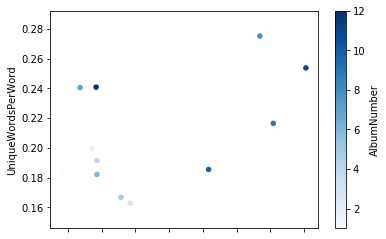

In [265]:
full_album_feats.plot.scatter('NumUniqueChords', 'UniqueWordsPerWord', c='AlbumNumber', colormap='Blues')

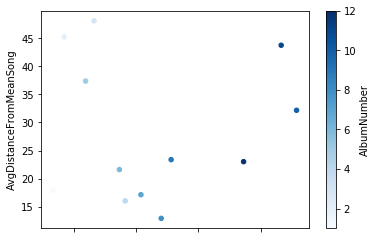

In [266]:
y = full_album_feats.plot.scatter('Intra-Album Variation', 'AvgDistanceFromMeanSong', c='AlbumNumber', colormap='Blues')

In [370]:
full_album_feats['Year'] = [1963, 1963, 1964, 1964, 1965, 1965, 1966, 1967, 1967, 1968, 1969, 1970]

x = full_album_feats["AvgDistanceFromMeanSong"].values
full_album_feats['AvgDistanceFromMeanSong'] = (x-x.mean())/x.std()
x = full_album_feats["Intra-Album Variation"].values
full_album_feats["Intra-Album Variation"] = (x-x.mean())/x.std()

In [371]:
full_album_feats

,Album,AlbumNumber,NumUniqueChords,NumKeyChanges,NumSegments,UniqueWordsPerWord,Intra-Album Variation,AvgDistanceFromMeanSong,Year
0,Please Please Me,1,7.846154,0.000000,9.307692,0.183031,-1.274926,-0.862176,1963
1,With the Beatles,2,8.714286,0.071429,10.785714,0.199484,-1.135626,1.415935,1963
2,A Hard Day's Night,3,9.846154,0.461538,10.307692,0.162908,-0.753098,1.655379,1964
3,Beatles for Sale,4,8.857143,0.000000,10.642857,0.191516,-0.355054,-1.013615,1964
4,Help!,5,9.571429,0.000000,10.428571,0.166741,-0.860825,0.762197,1965
5,Rubber Soul,6,8.857143,0.142857,11.428571,0.182141,-0.429096,-0.550220,1965
6,Revolver,7,8.357143,0.000000,10.928571,0.240482,-0.154283,-0.922030,1966
7,Sgt. Pepper's Lonely Hearts Club Band,8,13.692308,0.538462,10.000000,0.275120,0.104670,-1.272710,1967
8,Magical Mystery Tour,9,14.090909,0.000000,11.181818,0.216468,0.231321,-0.402828,1967
9,"The Beatles (""White Album"")",10,12.172414,0.103448,10.137931,0.185522,1.833387,0.329386,1968


# Resu

In [392]:
import bokeh
from bokeh.models import Circle, ColumnDataSource, HoverTool
from bokeh.plotting import figure, show

p = figure()
p = figure(toolbar_location="above", plot_width=600, title='"The Beatles" Albums: Musical vs. Lyrical Complexity')
p.background_fill_color = "#dddddd"
p.xaxis.axis_label = 'Average Unique Chords per Song'
p.yaxis.axis_label = 'Average Unique Word Rate'

p.circle(x="NumUniqueChords", y="UniqueWordsPerWord",color='blue', size=8, source=ColumnDataSource(full_album_feats))

p.add_tools(HoverTool(tooltips=[
    ('Album', '@Album'),
    ('Album Number', '@AlbumNumber'),
    ('Year', '@Year'),
    ("Average Unique Chords", "@NumUniqueChords"),
    ("Unique Word Rate", "@UniqueWordsPerWord")
]))
show(p)

In [393]:
p = figure()
p = figure(toolbar_location="above", plot_width=600, title='"The Beatles" Albums: Intra-Album Variation vs. Album Distance From Mean')
p.background_fill_color = "#dddddd"
p.xaxis.axis_label = 'Variation within Album (Normalized)'
p.yaxis.axis_label = 'Average Song Distance to Mean Song (Normalized)'

p.circle(x="Intra-Album Variation", y="AvgDistanceFromMeanSong",color='blue', size=8, source=ColumnDataSource(full_album_feats))

p.add_tools(HoverTool(tooltips=[
    ('Album', '@Album'),
    ('Album Number', '@AlbumNumber'),
    ('Year', '@Year'),
    ('Distance from Mean', "@AvgDistanceFromMeanSong"),
    ("Intra-Album Variation", "@{Intra-Album Variation}")
]))
show(p)

In [391]:
song_info.sort_values('DistFromMean')[['Song', 'Album', 'AlbumNumber', 'DistFromMean']]

,Song,Album,AlbumNumber,DistFromMean
132,Piggies,"The Beatles (""White Album"")",10,11.030817
45,Every Little Thing,Beatles for Sale,4,11.190359
49,What You're Doing,Beatles for Sale,4,15.988538
142,Sexy Sadie,"The Beatles (""White Album"")",10,16.558542
3,Baby It's You,Please Please Me,1,16.765083
...,...,...,...,...
172,Let It Be,Let It Be,12,165.630539
147,"Long, Long, Long","The Beatles (""White Album"")",10,178.204010
150,Sun King,Abbey Road,11,187.841141
166,Her Majesty,Abbey Road,11,203.765671


In [394]:
full_album_feats

,Album,AlbumNumber,NumUniqueChords,NumKeyChanges,NumSegments,UniqueWordsPerWord,Intra-Album Variation,AvgDistanceFromMeanSong,Year
0,Please Please Me,1,7.846154,0.000000,9.307692,0.183031,-1.274926,-0.862176,1963
1,With the Beatles,2,8.714286,0.071429,10.785714,0.199484,-1.135626,1.415935,1963
2,A Hard Day's Night,3,9.846154,0.461538,10.307692,0.162908,-0.753098,1.655379,1964
3,Beatles for Sale,4,8.857143,0.000000,10.642857,0.191516,-0.355054,-1.013615,1964
4,Help!,5,9.571429,0.000000,10.428571,0.166741,-0.860825,0.762197,1965
5,Rubber Soul,6,8.857143,0.142857,11.428571,0.182141,-0.429096,-0.550220,1965
6,Revolver,7,8.357143,0.000000,10.928571,0.240482,-0.154283,-0.922030,1966
7,Sgt. Pepper's Lonely Hearts Club Band,8,13.692308,0.538462,10.000000,0.275120,0.104670,-1.272710,1967
8,Magical Mystery Tour,9,14.090909,0.000000,11.181818,0.216468,0.231321,-0.402828,1967
9,"The Beatles (""White Album"")",10,12.172414,0.103448,10.137931,0.185522,1.833387,0.329386,1968
